In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage
import pandas as pd
from src.config import filepaths

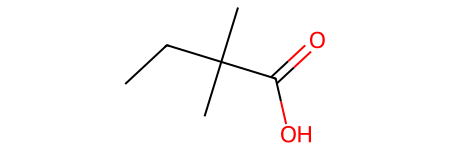

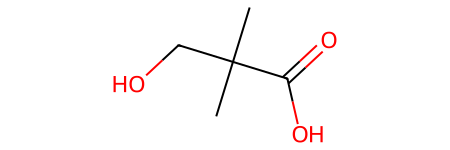

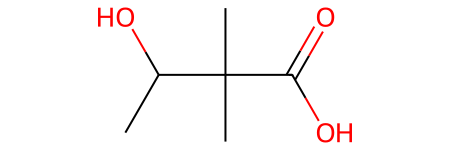

In [15]:
smiles = {
    'dmb': 'OC(=O)C(C)(C)CC',
    '3hpa': 'OC(=O)C(C)(C)CO',
    'dmhb': 'OC(=O)C(C)(C)C(C)O',
}

cols = ['id', 'smiles']

for n, s in smiles.items():
    display(Chem.MolFromSmiles(s))

df = pd.DataFrame(data=sorted(smiles.items()), columns=cols)
df.to_csv(filepaths['starters_targets'] / "bottle_targets_24.csv", sep=',', index=False)

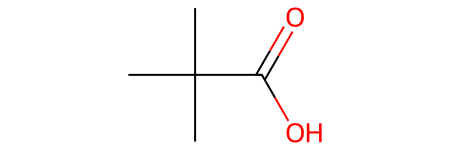

In [8]:
smiles = {
    'pivalic_acid': 'CC(C)(C)C(=O)O',
}

cols = ['id', 'smiles']

for n, s in smiles.items():
    display(Chem.MolFromSmiles(s))

df = pd.DataFrame(data=sorted(smiles.items()), columns=cols)
df.to_csv(filepaths['starters_targets'] / "pivalic_acid.csv", sep=',', index=False)

Amino acids

In [13]:
df = pd.read_csv(
    filepaths['starters_targets'] / "amino_acids.csv",
    sep=','
)

missing = {
    'id': ['proline', 'lysine', 'glutamic_acid'],
    'smiles': ['C1CC(NC1)C(=O)O', 'C(CCN)CC(C(=O)O)N', 'C(CC(=O)O)C(C(=O)O)N']
}

df = pd.concat((df, pd.DataFrame(data=missing))).reset_index(drop=True)

df.head(20)

,id,smiles
0,alanine,CC(N)C(=O)O
1,arginine,NC(N)=NCCCC(N)C(=O)O
2,asparagine,NC(=O)CC(N)C(=O)O
3,aspartic_acid,NC(CC(=O)O)C(=O)O
4,cysteine,NC(CS)C(=O)O
5,glutamine,NC(=O)CCC(N)C(=O)O
6,glycine,NCC(=O)O
7,histidine,NC(Cc1cnc[nH]1)C(=O)O
8,isoleucine,CCC(C)C(N)C(=O)O
9,leucine,CC(C)CC(N)C(=O)O


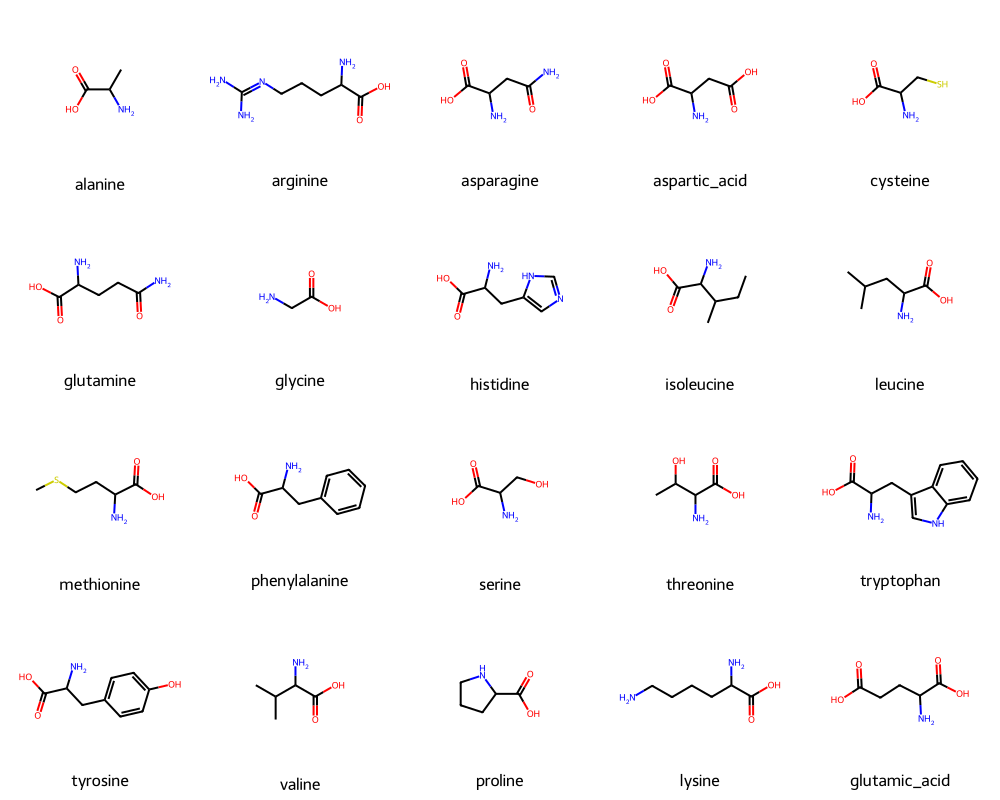

In [14]:
MolsToGridImage(
    [Chem.MolFromSmiles(smi) for smi in df['smiles']],
    legends=df['id'].to_list(),
    molsPerRow=5
)

In [15]:
df.to_csv(filepaths['starters_targets'] / "amino_acids.csv", sep=',', index=False)